# Numerical differentiation.

Remember that 

$$
f'(x)=\lim_{h\rightarrow 0} \frac{f(x+h)- f(x)}{h}
$$

what if we don't let $h\rightarrow 0$, but use a very small number for $h$? We can write:

$$
f'(x) \sim \frac{f(x+h)- f(x)}{h}.
$$

But it could also be 
$$
f'(x) \sim \frac{f(x)- f(x-h)}{h}.
$$
and even
$$
f'(x) \sim \frac{f(x+h)- f(x-h)}{2h}.
$$

The latter is the mean of the two former. 

What are the error on these approximations?

Let's check $f(x)=sin(x)$ with the derivative $f'(x)=cos(x)$ at the value $x=0.7$. 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Define the function and its lambda
f = lambda x: np.cos(x) #
df= lambda x: -np.sin(x) #  

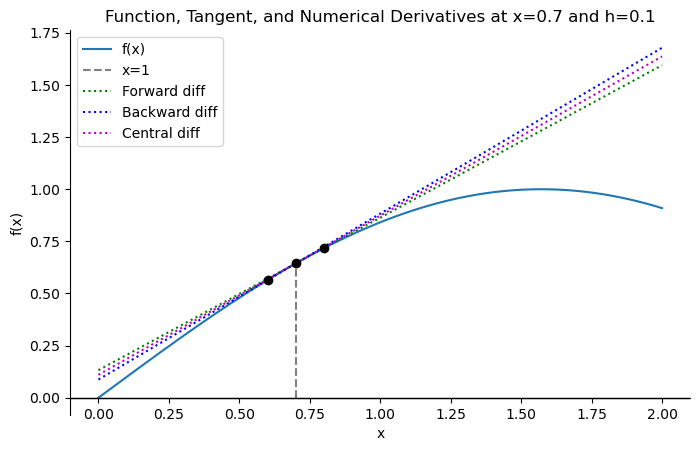

Exact Derivative at x=0.7: 0.7648421872844885
Forward Difference at x=0.7, h=0.1: 0.7313840366183166, error=0.03345815066617186
Backward Difference at x=0.7, h=0.1: 0.7957521384265565, error=0.03090995114206796
Central Difference at x=0.7, h=0.1: 0.7635680875224365, error=0.00127409976205195


In [202]:

# Plot f(x) for x in (0,2), vertical line at x=1, and tangent at x=1
x_vals = np.linspace(0, 2, 200) # Generate 200 points between 0 and 2
y_vals = f(x_vals) # Evaluate f(x) at each x value

x0 = 0.7 # Point we seek the derivative
h = 0.1 # Step size for numerical derivatives

# Compute tangent line at x0
slope = df(x0) # Slope of the tangent
tangent = slope * (x_vals - x0) + f(x0) # Equation of the tangent line

# Numerical derivatives at x0
forward_diff = (f(x0 + h) - f(x0)) / h # Forward difference
backward_diff = (f(x0) - f(x0 - h)) / h # Backward difference
central_diff = (f(x0 + h) - f(x0 - h)) / (2 * h) # Central difference

# Plot function and tangent
plt.figure(figsize=(8,5)) # Create a new figure
plt.plot(x_vals, y_vals, label='f(x)') # Plot f(x)
plt.vlines(x0, ymin=0, ymax=f(x0), color='gray', linestyle='--', label='x=1') # Vertical line at x=1
#plt.plot(x_vals, tangent, 'r--', label='Tangent at x=1') # Tangent line at x=1

# Plot forward, backward, and central difference lines
# Forward difference line
y_forward = forward_diff * (x_vals - x0) + f(x0) # Equation of the forward difference line
plt.plot(x_vals, y_forward, 'g:', label='Forward diff') # Forward difference line

# Backward difference line
y_backward = backward_diff * (x_vals - x0) + f(x0) # Equation of the backward difference line
plt.plot(x_vals, y_backward, 'b:', label='Backward diff')

# Central difference line
y_central = central_diff * (x_vals - x0) + f(x0) # Equation of the central difference line
plt.plot(x_vals, y_central, 'm:', label='Central diff') # Central difference line

plt.scatter([x0, x0+h, x0-h], [f(x0), f(x0+h), f(x0-h)], color='black', zorder=5) # Points used for finite differences
plt.xlabel('x') # X-axis label
plt.ylabel('f(x)') # Y-axis label
plt.gca().spines['bottom'].set_position('zero')  # Move x-axis to y=0
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axhline(0, color='black', linewidth=1)
plt.title(f'Function, Tangent, and Numerical Derivatives at x={x0} and h={h}') # Title of the plot
plt.legend() # Show legend
plt.show()

print(f"Exact Derivative at x={x0}: {df(x0)}")
print(f"Forward Difference at x={x0}, h={h}: {forward_diff}, error={abs(forward_diff - df(x0))}")
print(f"Backward Difference at x={x0}, h={h}: {backward_diff}, error={abs(backward_diff - df(x0))}")
print(f"Central Difference at x={x0}, h={h}: {central_diff}, error={abs(central_diff - df(x0))}")

Now, let's analyze the error as h varies

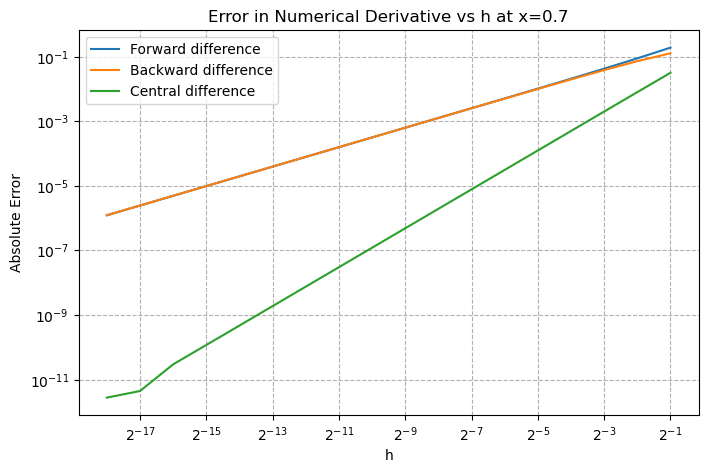

In [204]:
# Now, let's analyze the error as h varies

# Exact derivative at x0
x0 = 0.7

dx_forward = []
dx_backward = []
dx_central = []
errors_forward = []
errors_backward = []
errors_central = []
# Use the lambda functions defined earlier
#f = lambda x:x**2
#df = lambda x: 2*x

# Generate h_values if not already present
h_values = 2.** (- np.arange(1, 19))


for h_ in h_values:
    # Forward difference
    fwd = (f(x0 + h_) - f(x0)) / h_
    dx_forward.append(fwd)
    errors_forward.append(abs(fwd - df(x0)))
    # Backward difference
    bwd = (f(x0) - f(x0 - h_)) / h_
    dx_backward.append(bwd)
    errors_backward.append(abs(bwd - df(x0)))
    # Central difference
    cent = (f(x0 + h_) - f(x0 - h_)) / (2 * h_)
    dx_central.append(cent)
    errors_central.append(abs(cent - df(x0)))

plt.figure(figsize=(8,5))
plt.loglog(h_values, errors_forward, label='Forward difference')
plt.loglog(h_values, errors_backward, label='Backward difference')
plt.loglog(h_values, np.array(errors_central), label='Central difference')
plt.xlabel('h')
plt.ylabel('Absolute Error')
plt.title(f'Error in Numerical Derivative vs h at x={x0}')
plt.grid(True, which="both", ls="--")
plt.xscale('log', base=2)
plt.yscale('log')
plt.legend()
plt.show()

In [201]:
for i in range(len(errors_forward) - 1):
    print(f"Forward difference error ratio E_{i+1}/E_{i}: {errors_forward[i+1] / errors_forward[i]}")

Forward difference error ratio E_1/E_0: 0.4653868977009164
Forward difference error ratio E_2/E_1: 0.4792843574374238
Forward difference error ratio E_3/E_2: 0.48868245712673236
Forward difference error ratio E_4/E_3: 0.49408496249721784
Forward difference error ratio E_5/E_4: 0.4969761532383231
Forward difference error ratio E_6/E_5: 0.49847119675276597
Forward difference error ratio E_7/E_6: 0.49923134017588283
Forward difference error ratio E_8/E_7: 0.49961460069227853
Forward difference error ratio E_9/E_8: 0.4998070324431372
Forward difference error ratio E_10/E_9: 0.4999034491058219
Forward difference error ratio E_11/E_10: 0.4999517072957377
Forward difference error ratio E_12/E_11: 0.4999758535163897
Forward difference error ratio E_13/E_12: 0.4999879255176085
Forward difference error ratio E_14/E_13: 0.4999939150378219
Forward difference error ratio E_15/E_14: 0.49999726711153064
Forward difference error ratio E_16/E_15: 0.4999967547192047
Forward difference error ratio E_17/E

In [173]:
for i in range(len(errors_central) - 1):
    print(f"Central difference error ratio E_{i+1}/E_{i}: {errors_central[i+1] / errors_central[i]}")

Central difference error ratio E_1/E_0: 0.2523556457237215
Central difference error ratio E_2/E_1: 0.25058667922609007
Central difference error ratio E_3/E_2: 0.25014653070521786
Central difference error ratio E_4/E_3: 0.25003662398732723
Central difference error ratio E_5/E_4: 0.25000915545212793
Central difference error ratio E_6/E_5: 0.2500022886812692
Central difference error ratio E_7/E_6: 0.2500005715700115
Central difference error ratio E_8/E_7: 0.2500001394615442
Central difference error ratio E_9/E_8: 0.25000014149443234
Central difference error ratio E_10/E_9: 0.24999994145061286
Central difference error ratio E_11/E_10: 0.24999921066733652
Central difference error ratio E_12/E_11: 0.2500234892263905
Central difference error ratio E_13/E_12: 0.2505557785145601
Central difference error ratio E_14/E_13: 0.2468302971091069
Central difference error ratio E_15/E_14: 0.2647309608221514
Central difference error ratio E_16/E_15: 0.027903034412612306
Central difference error ratio E_1

We have used Python’s numpy library *np.linspace()* function, that partitions an interval in exactly the way that we want. The command takes the form *np.linspace(a, b, n)* where the interval is $[a,b]$ and $n$ the number of points used to create the partition. For example, *np.linspace(0,1,5)* will produce the list of numbers 0, 0.25, 0.5, 0.75, 1. Notice that there are 5 total points, the first point is $0$, the last point is $1$, and there are $4$ total sub intervals in the partition. Hence, if we want to partition the interval  into 20 equal sub intervals then we would use the command np.linspace(0,1,21) which would result in a list of numbers starting with 0, 0.05, 0.1, 0.15, etc. 

What command would you use to partition the interval $[5,10]$ into 100 equal sub intervals?


### Error estimates using Taylor expansion

Taylor expansion of $f(x+h)$ will be
$$
f(x+h)\sim f(x)+hf'(x)+\frac{1}{2}h^2 f''(x)+ O(h^3). 
$$

Rearranging

$$
f'(x) - \frac{f(x+h)- f(x)}{h} \sim \frac{1}{2}h f''(x)+ O(h^2) = O(h). 
$$

### Tasks:
1. Do the tasks above again, with this in mind. What do you notice? 

## Optimal h
Is it as small as possible? No. Our error is 
$$
E = c h +\frac{\delta}{h},
$$
with $c$ and $\delta$ being constants. The minima of this will be at 
$$
c-\frac{\delta}{h^2}=0 \Rightarrow h=\sqrt{\frac{\delta}{c}} \Rightarrow h=O(\sqrt{\delta})
$$

In [174]:
# Find machine precision (epsilon) for float type in numpy
eps = np.finfo(float).eps
print("Machine precision (epsilon) for float:", eps)
print(f"sqrt(eps) {np.sqrt(eps)}")  # Square root of machine precision


Machine precision (epsilon) for float: 2.220446049250313e-16
sqrt(eps) 1.4901161193847656e-08


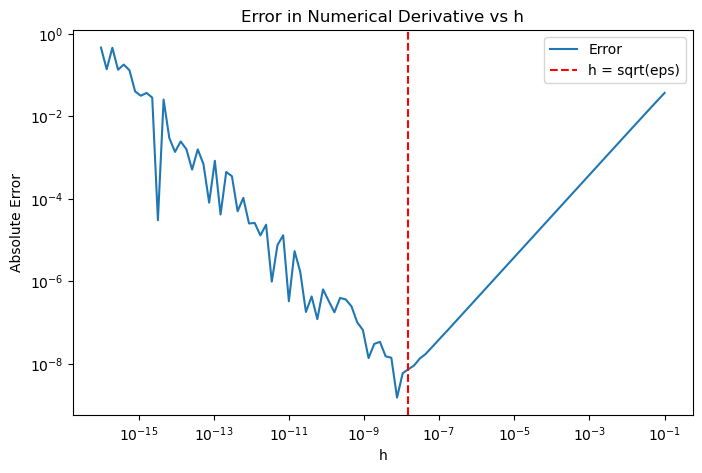

Minimum error occurs near h = 7.56e-09 for first order scheme
Error at h = sqrt(eps) (1.49e-08): 7.29e-09


In [175]:
# Define the function and its derivative
f = lambda x: np.cos(x)
df = lambda x: -np.sin(x)

# Choose a point to evaluate the derivative
x0 = 0.7

# Machine precision
eps = np.finfo(float).eps
h_values = np.logspace(-16, -1, 100)
errors = []

for h in h_values:
    num_derivative = (f(x0 + h) - f(x0)) / h # Forward difference
    num2_derivative = (f(x0 + h) - f(x0 - h)) / (2 * h) # Central difference
    exact = df(x0)
    error = np.abs(num_derivative - exact)
    errors.append(error)

# Find h closest to sqrt(eps)
h_opt = np.sqrt(eps)
idx_opt = np.argmin(np.abs(h_values - h_opt))

plt.figure(figsize=(8,5))
plt.loglog(h_values, errors, label='Error')
plt.axvline(h_opt, color='red', linestyle='--', label='h = sqrt(eps)')
plt.xlabel('h')
plt.ylabel('Absolute Error')
plt.title('Error in Numerical Derivative vs h')
plt.legend()
plt.show()

print(f"Minimum error occurs near h = {h_values[np.argmin(errors)]:.2e} for first order scheme")
print(f"Error at h = sqrt(eps) ({h_opt:.2e}): {errors[idx_opt]:.2e}")


# Second order central difference.

$$
f(x+h)= f(x)+hf'(x)+\frac{1}{2}h^2 f''(x)+ O(h^3) \\
f(x-h)= f(x)-hf'(x)+\frac{1}{2}h^2 f''(x)+ O(h^3) \\
$$
subtract the two equations and divide with 2h
$$
f'(x)=\frac{f(x+h)- f(x-h)}{2h} + O(h^2) 
$$
Now the error is
$$
E = c h^2 +\frac{\delta}{h},
$$
with minimum at 
$$
2 c h - \frac{\delta}{h^2}=0 \Rightarrow h\sim O\left((\frac{2c}{\delta})^{1/3}\right)
$$


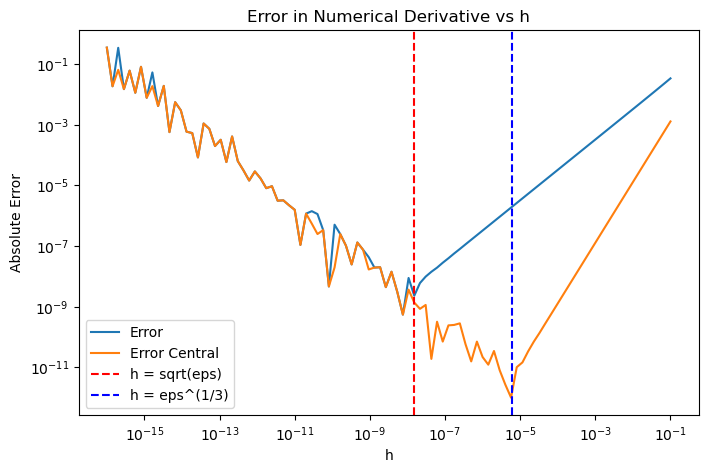

Minimum error occurs near h = 7.56e-09 for first order scheme
Error at h = sqrt(eps) (1.49e-08): 2.29e-09
Minimum error occurs near h = 5.72e-06 for second order scheme
Error at h = eps^(1/3) (6.06e-06): 1.00e-12


In [199]:
# Define the function and its derivative
f = lambda x: np.sin(x)
df = lambda x: np.cos(x)

# Choose a point to evaluate the derivative
x0 = 0.7

# Machine precision
eps = np.finfo(float).eps
h_values = np.logspace(-16, -1, 100)
errors = []
errors2 = []

for h in h_values:
    num_derivative = (f(x0 + h) - f(x0)) / h # Forward difference
    num2_derivative = (f(x0 + h) - f(x0 - h)) / (2 * h) # Central difference
    exact = df(x0)
    error = np.abs(num_derivative - exact)
    error2 = np.abs(num2_derivative - exact)
    errors.append(error)
    errors2.append(error2)

# Find h closest to sqrt(eps)
h_opt = np.sqrt(eps)
h2_opt= eps**(1/3)
idx_opt = np.argmin(np.abs(h_values - h_opt))
idx2_opt = np.argmin(np.abs(h_values - h2_opt))

plt.figure(figsize=(8,5))
plt.loglog(h_values, errors, label='Error')
plt.loglog(h_values,errors2,label='Error Central')
plt.axvline(h_opt, color='red', linestyle='--', label='h = sqrt(eps)')
plt.axvline(h2_opt, color='blue', linestyle='--', label='h = eps^(1/3)')
plt.xlabel('h')
plt.ylabel('Absolute Error')
plt.title('Error in Numerical Derivative vs h')
plt.legend()
plt.show()

print(f"Minimum error occurs near h = {h_values[np.argmin(errors)]:.2e} for first order scheme")
print(f"Error at h = sqrt(eps) ({h_opt:.2e}): {errors[idx_opt]:.2e}")
print(f"Minimum error occurs near h = {h_values[np.argmin(errors2)]:.2e} for second order scheme")
print(f"Error at h = eps^(1/3) ({h2_opt:.2e}): {errors2[np.argmin(errors2)]:.2e}")

**Try this** 
Change the function $f(x)$ and the corresponding derivative to $f(x)=x^2$. What do you see? Can you explain it? 

## Second order derivative
Taylor expansion, again.
$$
f(x+h)= f(x)+hf'(x)+\frac{1}{2}h^2 f''(x)+ \frac{1}{3!}h^3f'''(x)+O(h^4) \\[5mm]
f(x-h)= f(x)-hf'(x)+\frac{1}{2}h^2 f''(x)- \frac{1}{3!}h^3f'''(x)+O(h^4) 
$$
Now we want $f''(x)$ add the equations:
$$
f(x+h) + f(x-h) = 2 f(x)+h^2 f''(x)+O(h^4)\\[5mm]
\Downarrow \\[5mm]
f''(x) = \frac{f(x+h)- 2f(x) + f(x-h)}{h^2} +O(h^2)
$$

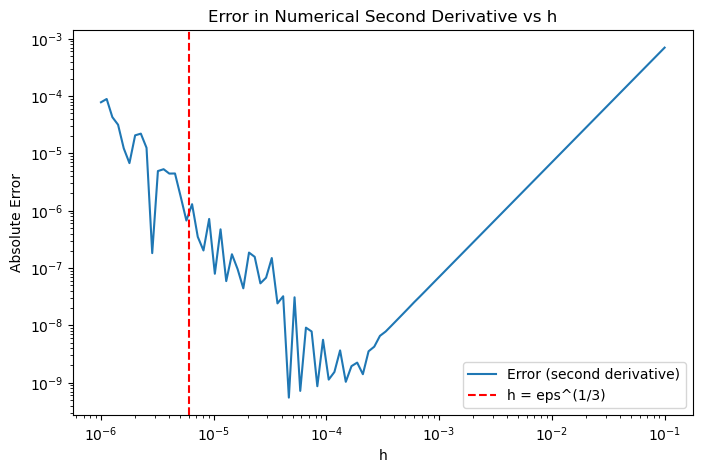

Minimum error occurs near h = 4.64e-05
Error at h = eps^(1/3) (6.06e-06): 6.75e-07


In [186]:
# Demonstrate optimal h for second order derivative using central difference

# Function and its second derivative
f = lambda x: np.sin(x)
d2f = lambda x: - np.sin(x)

x0 = 1.0  # Point to evaluate
h_values = np.logspace(-6, -1, 100)
errors_second_deriv = []

for h in h_values:
    # Central difference for second derivative
    num_second_deriv = (f(x0 + h) - 2*f(x0) + f(x0 - h)) / h**2
    exact = d2f(x0)
    errors_second_deriv.append(np.abs(num_second_deriv - exact))

# Estimate optimal h: for second order, optimal h ~ (machine epsilon)^(1/3)
h_opt2 = eps**(1/3)
idx_opt2 = np.argmin(np.abs(h_values - h_opt2))

plt.figure(figsize=(8,5))
plt.loglog(h_values, errors_second_deriv, label='Error (second derivative)')
plt.axvline(h_opt2, color='red', linestyle='--', label='h = eps^(1/3)')
plt.xlabel('h')
plt.ylabel('Absolute Error')
plt.title('Error in Numerical Second Derivative vs h')
plt.legend()
plt.show()

print(f"Minimum error occurs near h = {h_values[np.argmin(errors_second_deriv)]:.2e}")
print(f"Error at h = eps^(1/3) ({h_opt2:.2e}): {errors_second_deriv[idx_opt2]:.2e}")

## Differential equations
What if we don't now the function, like in differential equations? This is where discretization enters the arena. 

This code demonstrates the discretization of the first-order ordinary differential equation (ODE) $\frac{dy}{dx} = -y$ with the initial condition $y(0) = 1$ using the Forward Euler method. The Forward Euler method is an explicit numerical scheme for solving ODEs, where the next value is estimated using the current value and the derivative at that point.

The ODE is discretized over the interval $[0, 5]$ with 50 steps. At each step, the numerical solution is updated as:
$$
y_{i+1} = y_i + h \cdot f(y_i, x_i)
$$
where $h$ is the step size and $f(y, x) = -y$ is the right-hand side of the ODE.

The code also computes the exact solution $y(x) = e^{-x}$ for comparison and plots both the numerical and exact solutions to illustrate the accuracy of the Forward Euler method.


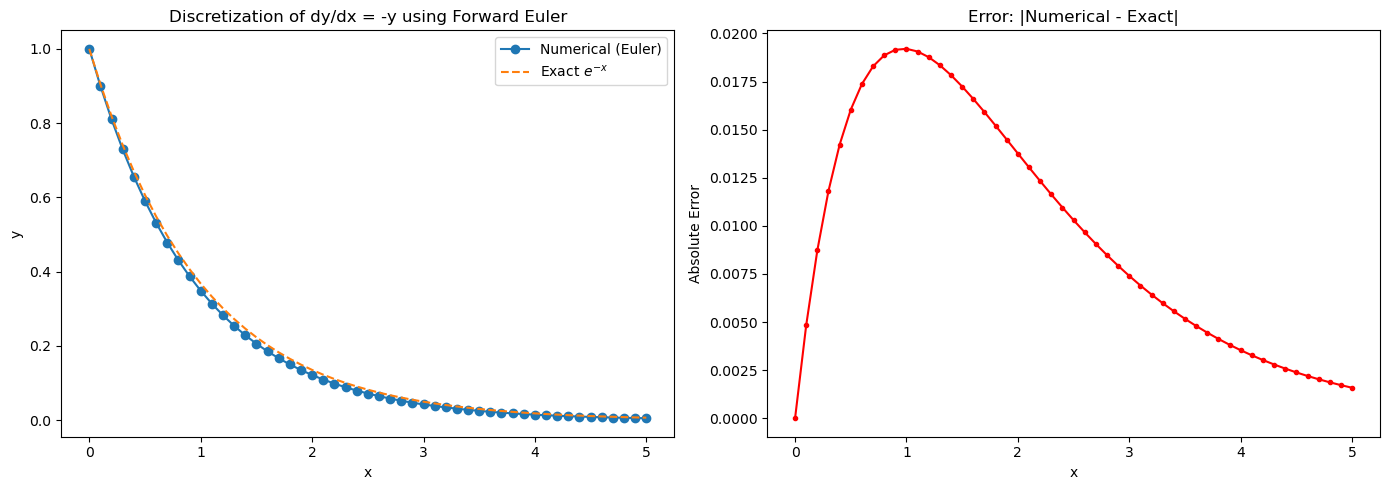

In [148]:
# Example: Discretization of the first order ODE dy/dx = -y, y(0) = 1 using Forward Euler method

def f(y, x):
    return -y

# Discretization parameters
x_start, x_end = 0, 5
n_steps = 50
x_vals = np.linspace(x_start, x_end, n_steps + 1)
h = (x_end - x_start) / n_steps

# Initial condition
y = np.zeros_like(x_vals)
y[0] = 1

# Forward Euler iteration
for i in range(n_steps):
    y[i+1] = y[i] + h * f(y[i], x_vals[i])

# Exact solution for comparison
y_exact = np.exp(-x_vals)


# Plot error between numerical and exact solution
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Left: solutions
axs[0].plot(x_vals, y, 'o-', label='Numerical (Euler)')
axs[0].plot(x_vals, y_exact, '--', label='Exact $e^{-x}$')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Discretization of dy/dx = -y using Forward Euler')
axs[0].legend()

# Right: error
error = np.abs(y - y_exact)
axs[1].plot(x_vals, error, 'r.-')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Absolute Error')
axs[1].set_title('Error: |Numerical - Exact|')

plt.tight_layout()
plt.show()